In [5]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv("employee_churn_data.csv")

In [7]:
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
promoted,9540.0,0.030294,0.171403,0.00000,0.000000,0.000000,0.000000,1.000000
review,9540.0,0.651826,0.085307,0.31000,0.592884,0.647456,0.708379,1.000000
projects,9540.0,3.274843,0.579136,2.00000,3.000000,3.000000,4.000000,5.000000
tenure,9540.0,6.556184,1.415432,2.00000,5.000000,7.000000,8.000000,12.000000
satisfaction,9540.0,0.504645,0.158555,0.00000,0.386801,0.500786,0.622607,1.000000
bonus,9540.0,0.212055,0.408785,0.00000,0.000000,0.000000,0.000000,1.000000
avg_hrs_month,9540.0,184.661571,4.144831,171.37406,181.472085,184.628796,187.728708,200.861656


In [10]:
df.isnull().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [11]:
df["left"] = df["left"].map({"yes":True,"no":False})
df["salary"] = df["salary"].map({"low":1, "medium":2, "high":3})

In [12]:
df.groupby("left").agg(["mean","median","count","min","max"]).T

C:\Users\artur\AppData\Local\Temp\ipykernel_12152\4233260083.py:1: FutureWarning: ['department'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("left").agg(["mean","median","count","min","max"]).T


left                        False         True
promoted      mean       0.034340     0.020474
              median     0.000000     0.000000
              count   6756.000000  2784.000000
              min        0.000000     0.000000
              max        1.000000     1.000000
review        mean       0.635164     0.692262
              median     0.634527     0.698151
              count   6756.000000  2784.000000
              min        0.310000     0.330479
              max        1.000000     0.994363
projects      mean       3.279455     3.263649
              median     3.000000     3.000000
              count   6756.000000  2784.000000
              min        2.000000     2.000000
              max        5.000000     5.000000
salary        mean       2.017170     2.018319
              median     2.000000     2.000000
              count   6756.000000  2784.000000
              min        1.000000     1.000000
              max        3.000000     3.000000
tenure        mean       6.546625     6.579382
              median     6.000000     7.000000
              count   6756.000000  2784.000000
              min        2.000000     2.000000
              max       12.000000     9.000000
satisfaction  mean       0.505634     0.502244
              median     0.504073     0.491455
              count   6756.000000  2784.000000
              min        0.000000     0.086249
              max        1.000000     0.980994
bonus         mean       0.215068     0.204741
              median     0.000000     0.000000
              count   6756.000000  2784.000000
              min        0.000000     0.000000
              max        1.000000     1.000000
avg_hrs_month mean     184.637605   184.719730
              median   184.088608   186.303857
              count   6756.000000  2784.000000
              min      172.297984   171.374060
              max      200.861656   193.255034

In [13]:

df[["review","satisfaction","left"]].groupby("left").agg(["mean","median","count","min","max"]).T

left                       False         True
review       mean       0.635164     0.692262
             median     0.634527     0.698151
             count   6756.000000  2784.000000
             min        0.310000     0.330479
             max        1.000000     0.994363
satisfaction mean       0.505634     0.502244
             median     0.504073     0.491455
             count   6756.000000  2784.000000
             min        0.000000     0.086249
             max        1.000000     0.980994

In [14]:
import matplotlib.pyplot as plt

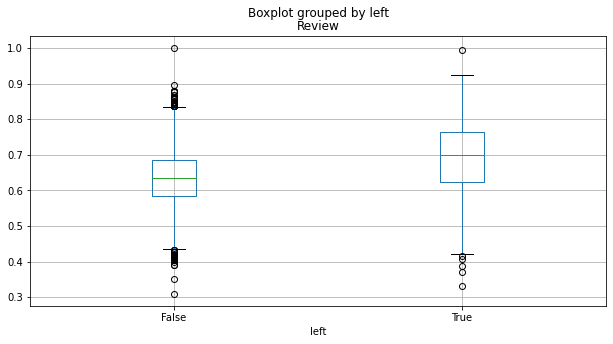

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

df.boxplot(column=["review"],by="left", ax = ax)
plt.title("Review")
plt.show()

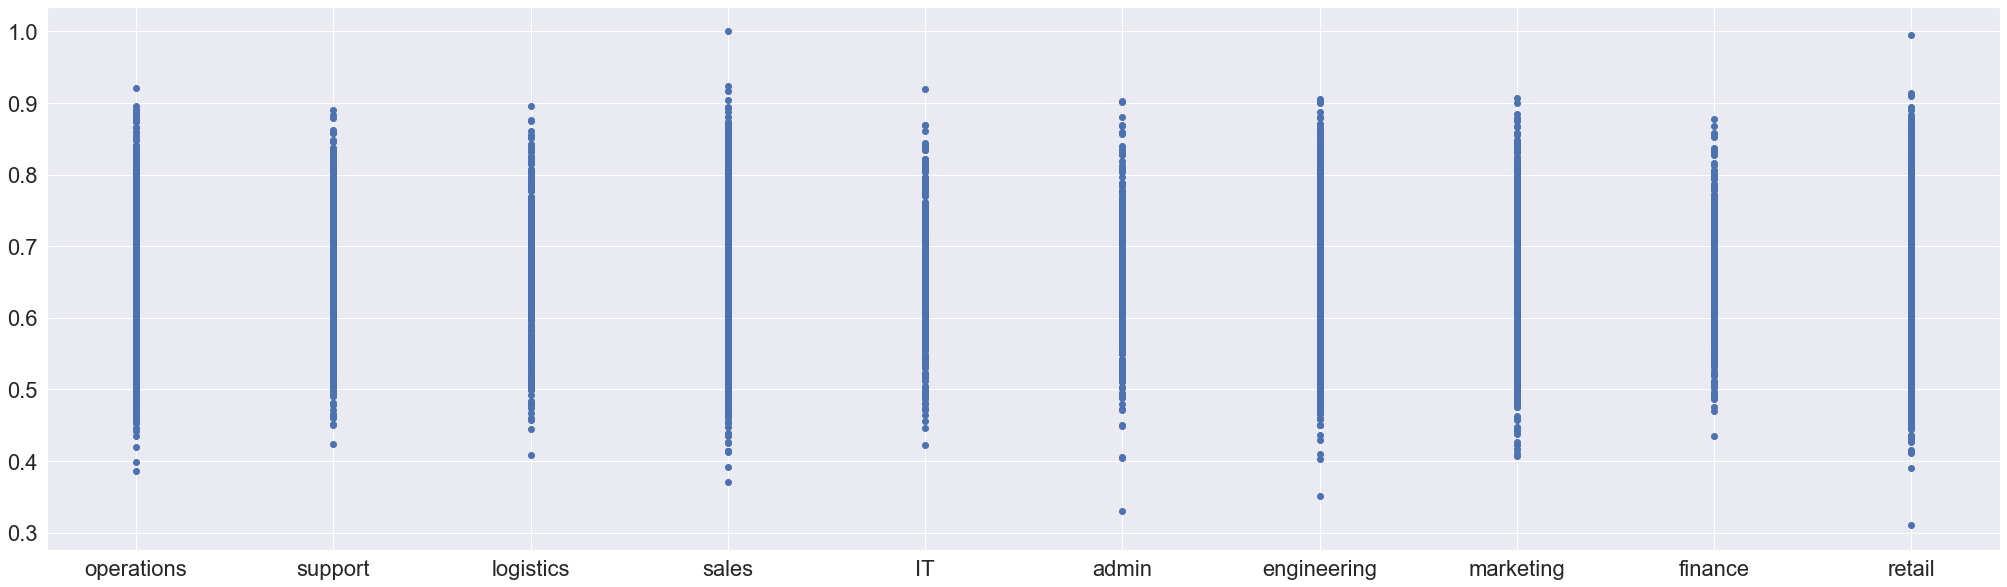

In [62]:
fig, ax = plt.subplots(figsize=(35,10))
plt.scatter(df["department"], df["review"].values)

In [17]:
import seaborn as sns

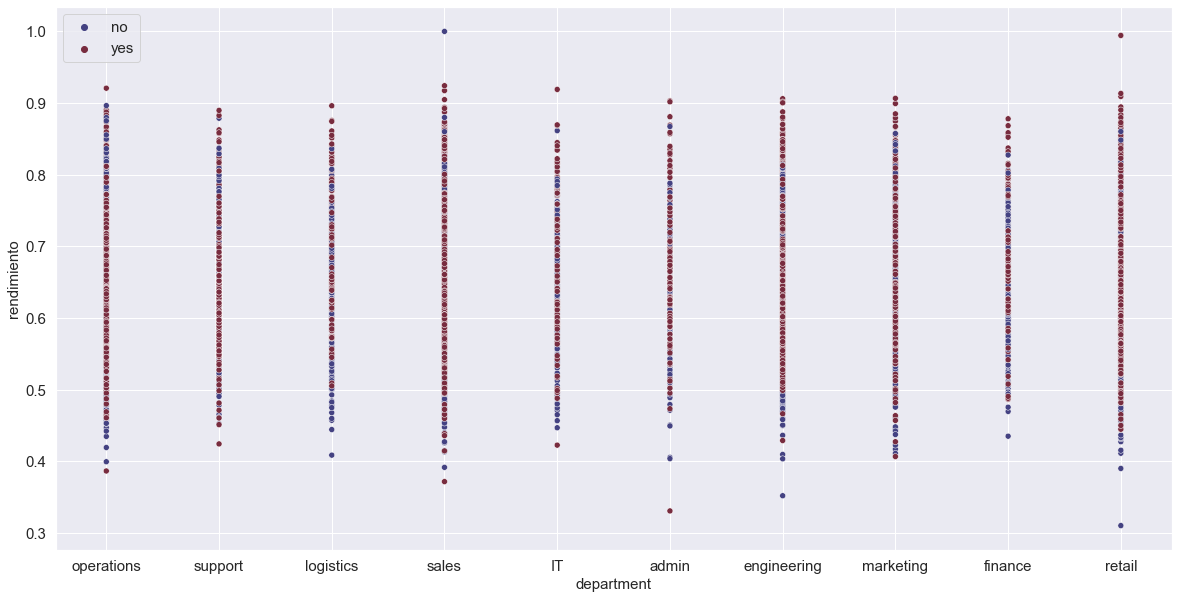

In [83]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.scatterplot(x="department", y="review", hue="left", data = df, palette="icefire")
plt.legend(loc="upper left", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xlabel("department", fontsize = 15)
plt.ylabel("rendimiento",fontsize = 15)
plt.show()

c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

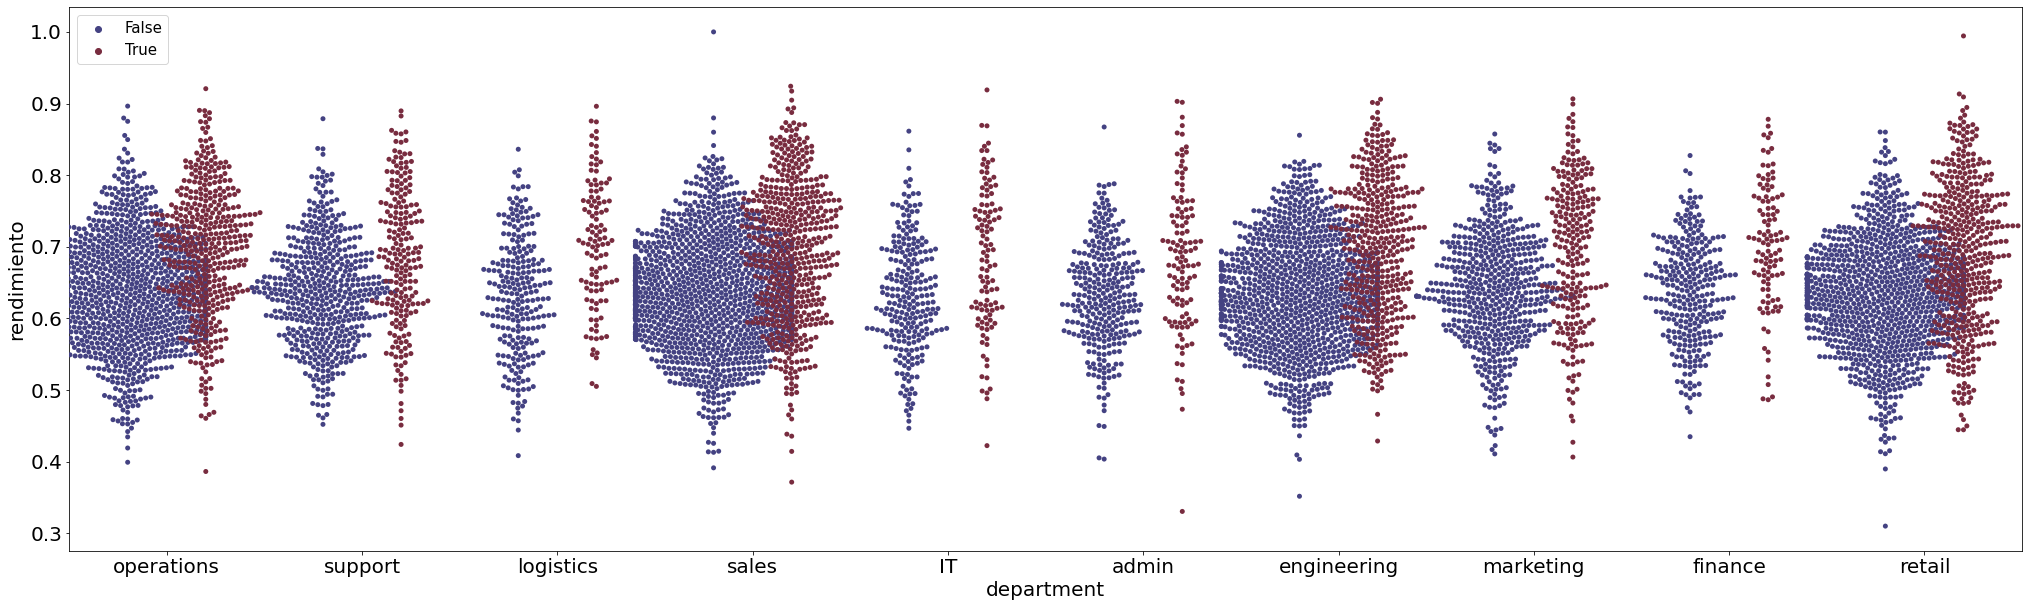

In [18]:
fig, ax = plt.subplots(figsize=(35,10))

ax = sns.swarmplot(x="department", y="review", hue="left", data = df, palette="icefire", dodge = True)
plt.legend(loc="upper left", fontsize = 15)
plt.tick_params(labelsize = 20)
plt.xlabel("department", fontsize = 20)
plt.ylabel("rendimiento",fontsize = 20)
plt.show()

c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\artur\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

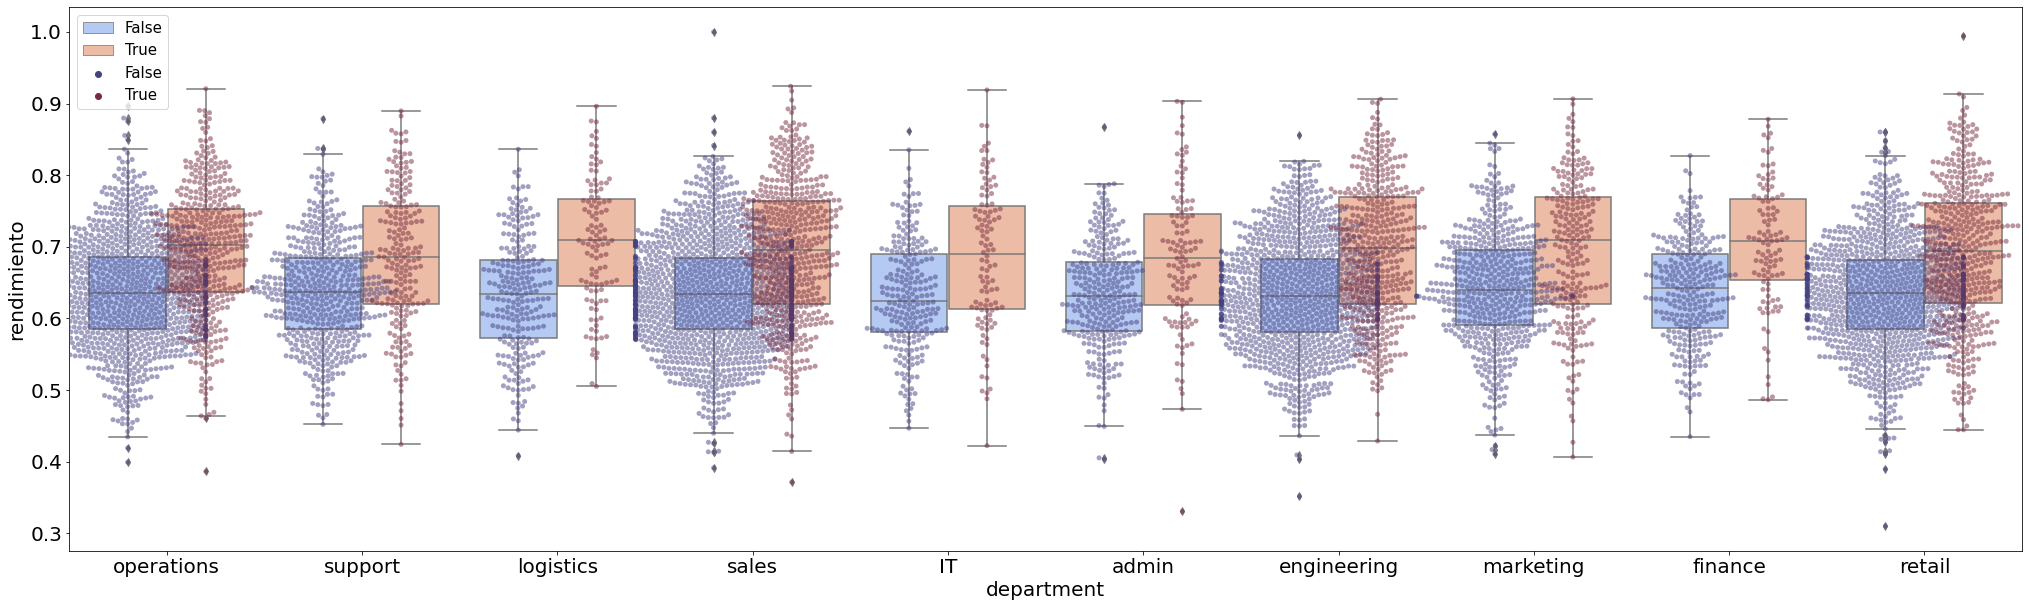

In [19]:
fig, ax = plt.subplots(figsize=(35,10))

ax = sns.boxplot(x="department", y="review", hue="left", data=df, palette="coolwarm", dodge = True)   

ax = sns.swarmplot(x="department", y="review", hue="left", data = df, palette="icefire", dodge = True, alpha=0.5)
plt.legend(loc="upper left", fontsize = 15)
plt.tick_params(labelsize = 20)
plt.xlabel("department", fontsize = 20)
plt.ylabel("rendimiento",fontsize = 20)
plt.show()


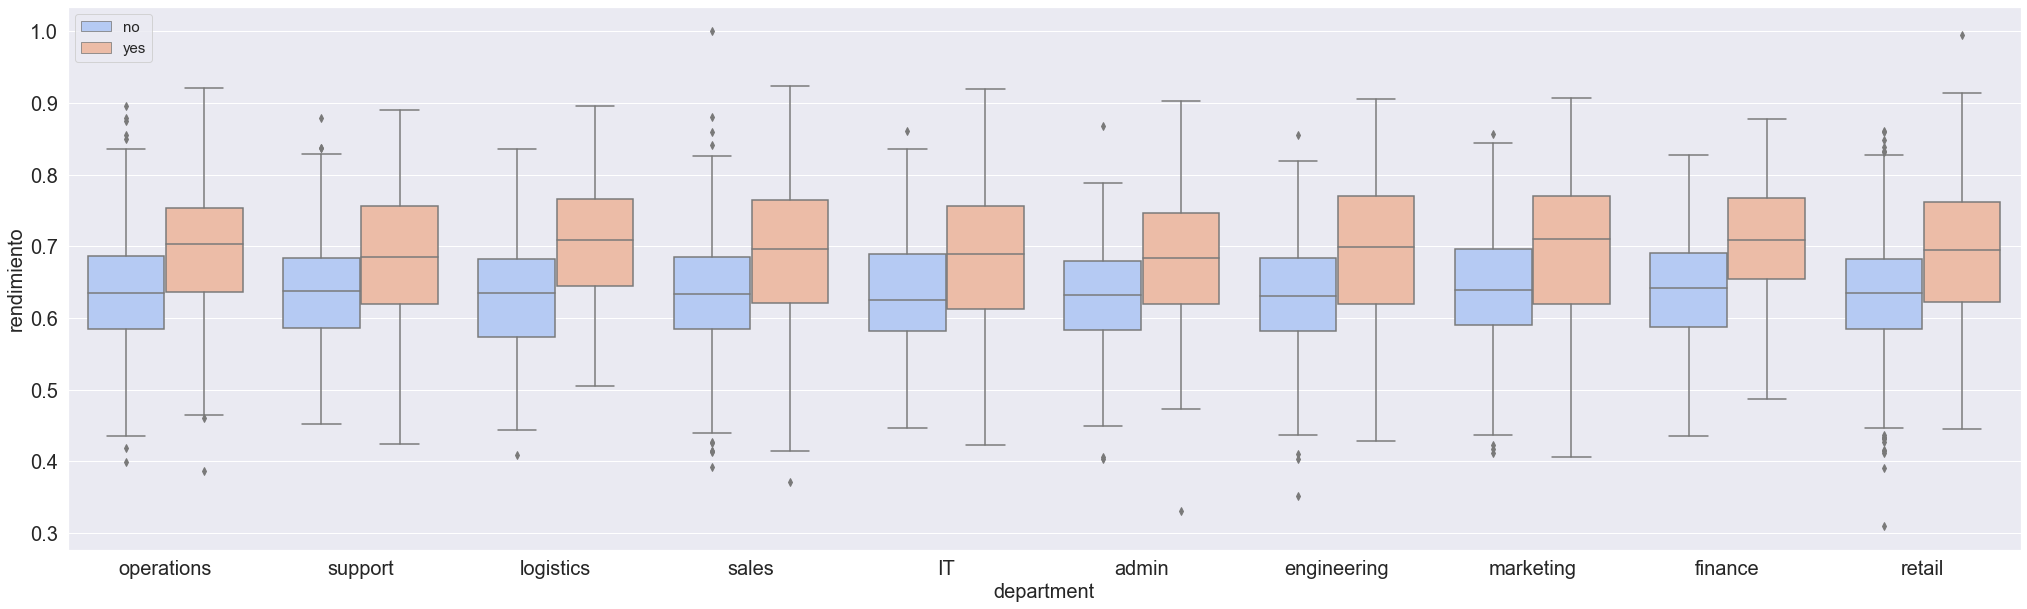

In [86]:
fig, ax = plt.subplots(figsize=(35,10))

ax = sns.boxplot(x="department", y="review", hue="left", data=df, palette="coolwarm", dodge = True)   

#ax = sns.swarmplot(x="department", y="review", hue="left", data = df, palette="icefire", dodge = True)
plt.legend(loc="upper left", fontsize = 15)
plt.tick_params(labelsize = 20)
plt.xlabel("department", fontsize = 20)
plt.ylabel("rendimiento",fontsize = 20)
plt.show()

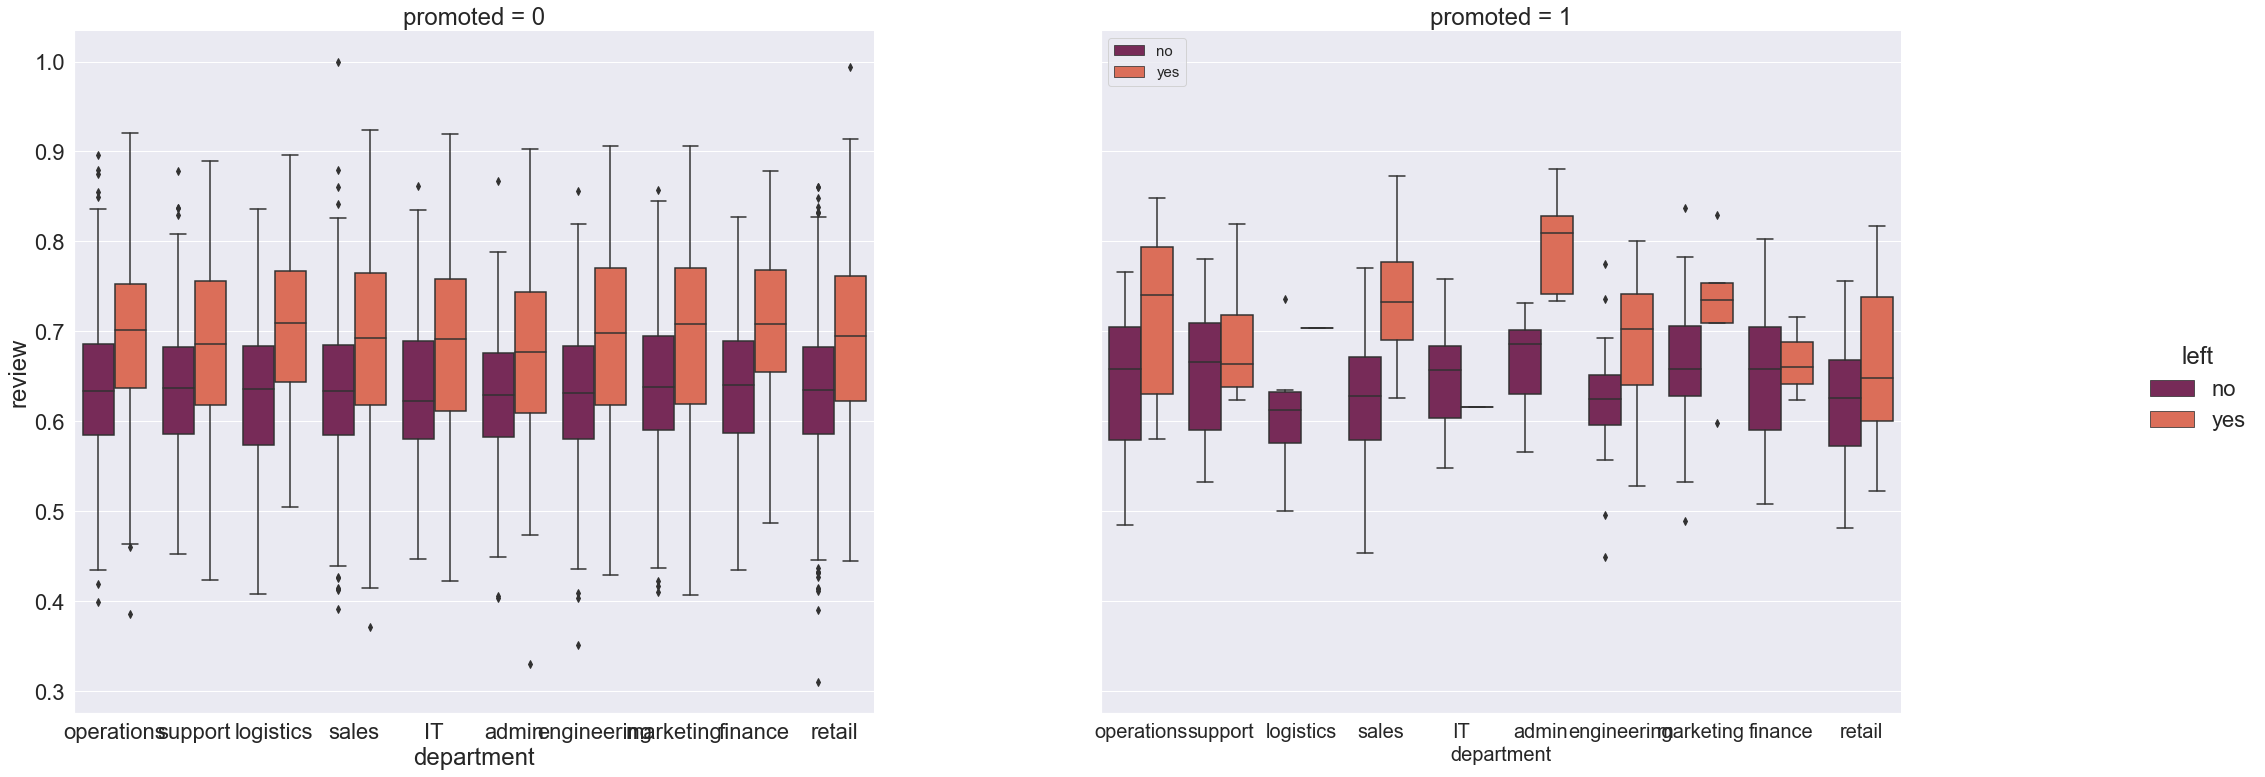

In [88]:
#fig, ax = plt.subplots(figsize=(35,10))

#ax = sns.boxplot(x="department", y="review", hue="left", data=df, palette="flare", dodge = True)   

ax = sns.catplot(x="department", y="review", hue="left", kind="box", col="promoted", data = df, palette="rocket", dodge = True)

plt.legend(loc="upper left", fontsize = 15)
plt.tick_params(labelsize = 20)
plt.xlabel("department", fontsize = 20)
plt.ylabel("rendimiento",fontsize = 20)

ax.fig.set_size_inches(35,15)
plt.show()